In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
# Load the data
file_path = r"C:\Users\katya\Downloads\gold_prices_data.csv"
gold_data = pd.read_csv(file_path)

In [3]:
# Convert categorical variables into dummy variables
gold_data_encoded = pd.get_dummies(gold_data, drop_first=True)

In [4]:
# Define the dependent variable and independent variables
X = gold_data_encoded.drop(columns=["Gold Price (INR/gram)"])
y = gold_data_encoded["Gold Price (INR/gram)"]

# Add a constant for the intercept
X = sm.add_constant(X)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Fit the regression model
model = sm.OLS(y_train, X_train).fit()

# Model Summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Gold Price (INR/gram)   R-squared:                       0.795
Model:                               OLS   Adj. R-squared:                  0.788
Method:                    Least Squares   F-statistic:                     116.3
Date:                   Fri, 22 Nov 2024   Prob (F-statistic):           7.67e-12
Time:                           18:39:13   Log-Likelihood:                -255.18
No. Observations:                     32   AIC:                             514.4
Df Residuals:                         30   BIC:                             517.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
# --- Interpretation of Statistical Measures ---
# 1. R-squared and Adj. R-squared:
#    - R-squared explains the proportion of variance in gold prices explained by independent variables.
#    - Adj. R-squared adjusts R-squared for the number of predictors; a better measure for multiple regression.
# 2. F-statistic and p-value:
#    - Indicates overall model significance. A low p-value (< 0.05) confirms the model is statistically significant.
# 3. Coefficients:
#    - Represent the change in the dependent variable (gold price) per unit change in the predictor.
# 4. P-values for coefficients:
#    - Determine the statistical significance of each predictor. Predictors with p-values < 0.05 are significant.
# 5. Durbin-Watson:
#    - Detects autocorrelation in residuals. A value near 2 is ideal; significant deviations suggest issues.
# 6. Omnibus, Jarque-Bera:
#    - Tests for normality in residuals. Significant results indicate deviations from normality.

In [8]:
# Assumption Check: VIF for multicllinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)


Variance Inflation Factor (VIF):
                                     Variable       VIF
0                                       Year  1.000000
1                         Inflation Rate (%)  0.000000
2                          U.S. Dollar Index  0.001674
3               Crude Oil Price (USD/barrel)  0.000000
4                          Interest Rate (%)  0.000000
5                 Consumer Price Index (CPI)  0.000000
6                  Gold Supply (metric tons)  0.000000
7               Jewelry Demand (metric tons)  0.000000
8            Investment Demand (metric tons)  0.000000
9   Central Bank Gold Reserves (metric tons)  0.000000
10                   Exchange Rate (INR/USD)  0.000000
11           Global Economic Growth Rate (%)  0.044858
12                 Political Stability Index  0.000000
13               Geopolitical Tensions Index  0.000400
14              Stock Market Performance (%)  0.000000
15                     Seasonal Demand Index  0.000000
16                   Import Du

C:\Users\katya\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [9]:
# --- Interpretation of VIF ---
# - VIF > 10 suggests high multicollinearity, which may affect the stability of coefficient estimates.

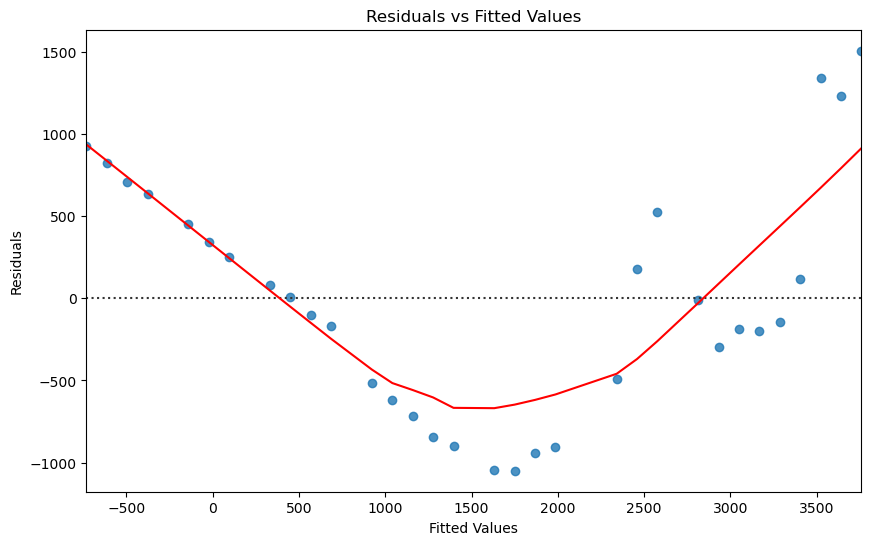

In [22]:
# Visualizations for assumptions
# Residuals vs Fitted Values Plot
fitted_values = model.fittedvalues
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1.5})
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# --- Interpretation of Residuals vs Fitted Plot ---
# - The residuals should be randomly scattered around zero. Patterns indicate issues with model fit or heteroscedasticity.

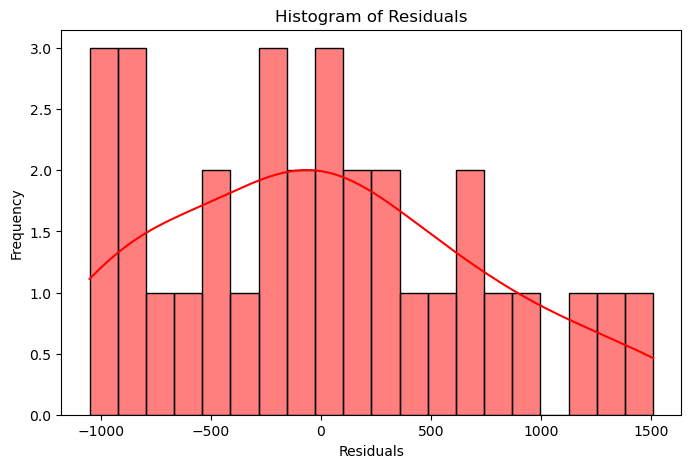

In [13]:
# Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='red', bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# --- Interpretation of Residual Histogram ---
# - Residuals should follow a normal distribution. Deviations suggest violations of normality assumption.

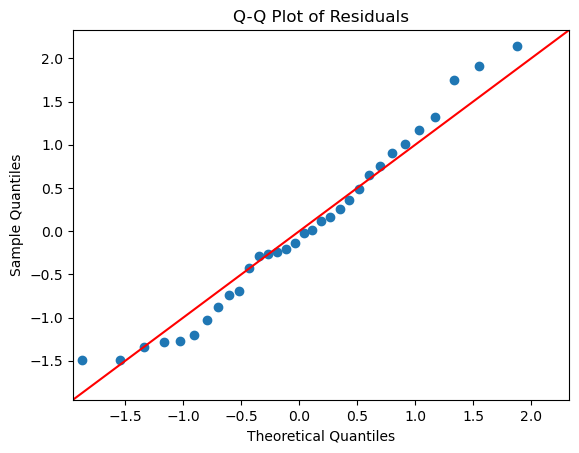

In [14]:
# Q-Q Plot
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

# --- Interpretation of Q-Q Plot ---
# - Residuals should lie close to the 45-degree line. Significant deviations suggest non-normality.

In [15]:
# Predictions on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# --- Interpretation of RMSE ---
# - Measures the average error between predicted and actual values. Lower RMSE indicates a better model.

Root Mean Squared Error (RMSE): 1842.9626357794875


In [16]:
# Predict future gold prices for the next 10 years
current_year = datetime.now().year
future_years = pd.DataFrame({"Year": range(current_year, current_year + 10)})
future_data = X_train.iloc[0:1].copy()

In [27]:
# Replace "Year" in dummy variables and keep all other variables constant
for i in range(10):
    future_data.loc[i] = X_train.iloc[0]
    future_data.at[i, "Year"] = future_years.at[i, "Year"]

future_predictions = model.predict(future_data)
future_years["Predicted Price (INR/gram)"] = future_predictions

# Add percentage changes
future_years["Annual % Change"] = future_years["Predicted Price (INR/gram)"].pct_change() * 100

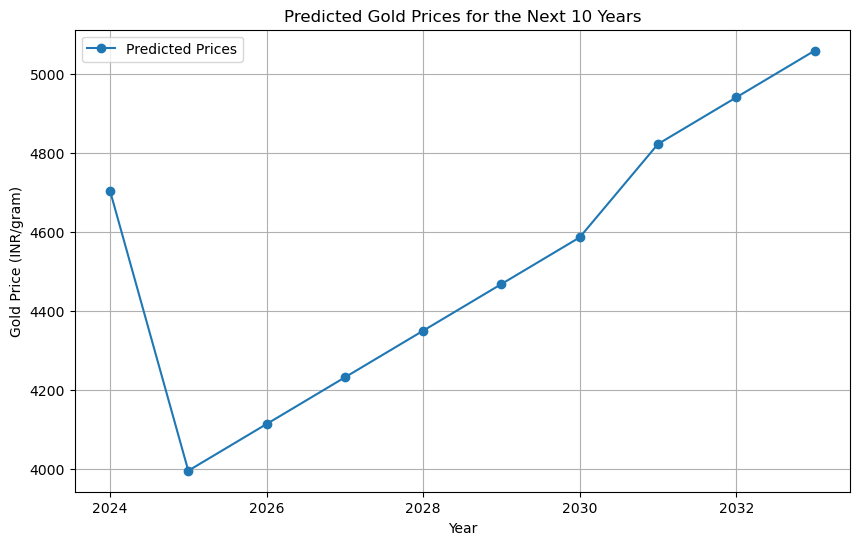

In [19]:
# Visualizing Predictions
plt.figure(figsize=(10, 6))
plt.plot(future_years["Year"], future_predictions, marker='o', label="Predicted Prices")
plt.title("Predicted Gold Prices for the Next 10 Years")
plt.xlabel("Year")
plt.ylabel("Gold Price (INR/gram)")
plt.grid(True)
plt.legend()
plt.show()
# --- Interpretation of Prediction Plot ---
# - Shows the projected trend in gold prices over the next 10 years based on current data trends.

In [20]:
# Final Recommendation
if future_predictions.pct_change().mean() > 0:
    print("Recommendation: Investing in gold today is advisable as prices are expected to increase.")
else:
    print("Recommendation: Investing in gold today may not be advisable as prices are expected to decrease.")

Recommendation: Investing in gold today is advisable as prices are expected to increase.


In [30]:
# Trend Analysis and Recommendation
avg_annual_increase = future_years["Annual % Change"].mean()
if avg_annual_increase > 0:
    recommendation = "Investing in gold today is advisable as prices are expected to increase consistently."
else:
    recommendation = "Investing in gold today may not be advisable as prices are expected to decline."

print("\n--- Research Summary ---")
print(f"1. The average annual percentage increase in gold prices over the next 10 years is {avg_annual_increase:.2f}%.")
print(f"2. The RMSE for the model is {rmse:.2f}, indicating the model's prediction accuracy.")
print(f"3. Based on the predictions, {recommendation}")


--- Research Summary ---
1. The average annual percentage increase in gold prices over the next 10 years is 2.66%.
2. The RMSE for the model is 1842.96, indicating the model's prediction accuracy.
3. Based on the predictions, Investing in gold today is advisable as prices are expected to increase consistently.
